In [ ]:
#  What is the optimal processing for higher livetime (i.e. low incident solar rates)
# 
#  This one is the April 2019 with an XBP in the pointing, during very quiet time
# 
#  07-Oct-2020 IGH

In [2]:
%matplotlib inline

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [3]:
plt.rcParams.update({'font.size': 14,'font.family':"sans-serif",\
                     'font.sans-serif':"Arial",'mathtext.default':"regular"})

In [4]:
mosid='319'
mdir='/Users/iain/data/heasarc_nustar/ns_20190425/20511'+mosid+'001/'

# This is using the default filtering (no statusexpr=....)
dir0=mdir+'event_cl_def/'
# This is using the old filtering (statusexpr="STATUS==b0000xx00xx0xx000" cleanflick=no)
dir1=mdir+'event_cl_ods/'
# This is using the "new" filtering (statusexpr="STATUS==b0000xxx00xxxx000")
dir2=mdir+'event_cl_nws/'


FPMA
Ontime:  99.99999988079071 s , Livetime 58.4381424022218 s
Livetime %:  58.4381424718855 58.4381424718855 58.4381424718855
Number of events: 
evtd0(def):  14096
evtd1(old):  14552
evtd2(new):  14492
def, all vs g0:  14096 13905
old, all vs g0:  14552 14320
new, all vs g0:  14492 14273


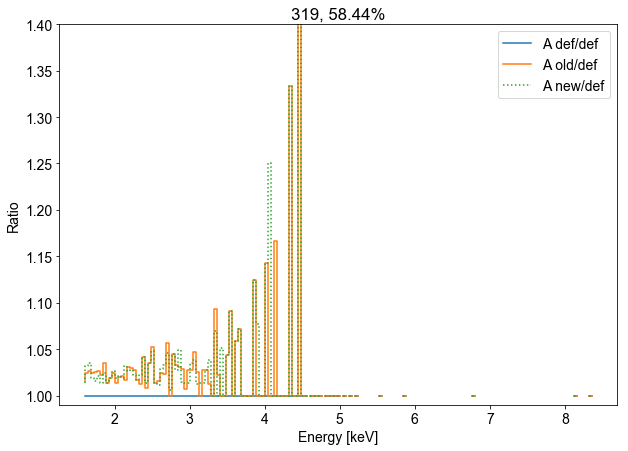

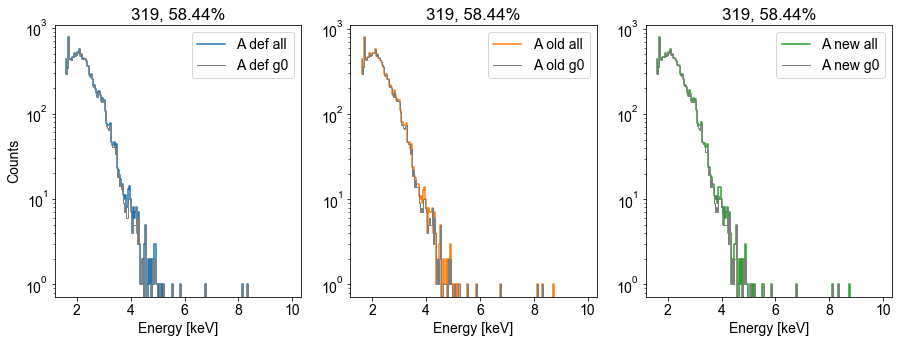

In [5]:
#  Now repeat all this for FPMA
print('FPMA')
infile='nu20511'+mosid+'001A06_cl.evt'
hdulist = fits.open(dir0+infile)
evtd0a=hdulist[1].data
hdr0a= hdulist[1].header
hdulist.close()

hdulist = fits.open(dir1+infile)
evtd1a=hdulist[1].data
hdr1a= hdulist[1].header
hdulist.close()

hdulist = fits.open(dir2+infile)
evtd2a=hdulist[1].data
hdr2a= hdulist[1].header
hdulist.close()

# Double check livetimes and how many events made it through
lvper0a=100.*hdr0a['livetime']/hdr0a['ontime']
lvper1a=100.*hdr1a['livetime']/hdr1a['ontime']
lvper2a=100.*hdr2a['livetime']/hdr2a['ontime']
print('Ontime: ',hdr0a['ontime'],'s , Livetime',hdr0a['livetime'],'s')
print('Livetime %: ',lvper0a,lvper1a,lvper2a)
print('Number of events: ')
print('evtd0(def): ',len(evtd0a['pi']))
print('evtd1(old): ',len(evtd1a['pi']))
print('evtd2(new): ',len(evtd2a['pi']))

# Make spectra for all events
hist0a, be0a=np.histogram(evtd0a['pi']*0.04+1.6,bins=np.arange(1.6,10,0.04))
hist1a, be1a=np.histogram(evtd1a['pi']*0.04+1.6,bins=np.arange(1.6,10,0.04))
hist2a, be2a=np.histogram(evtd2a['pi']*0.04+1.6,bins=np.arange(1.6,10,0.04))

# work out the grade 0 spectra as well
g0pi0a=evtd0a['pi'][evtd0a['grade']==0]
hist0g0a, be0g0a=np.histogram(g0pi0a*0.04+1.6,bins=np.arange(1.6,10,0.04))
g0pi1a=evtd1a['pi'][evtd1a['grade']==0]
hist1g0a, be1g0a=np.histogram(g0pi1a*0.04+1.6,bins=np.arange(1.6,10,0.04))
g0pi2a=evtd2a['pi'][evtd2a['grade']==0]
hist2g0a, be2g0a=np.histogram(g0pi2a*0.04+1.6,bins=np.arange(1.6,10,0.04))

print('def, all vs g0: ',len(evtd0a['pi']),len(g0pi0a))
print('old, all vs g0: ',len(evtd1a['pi']),len(g0pi1a))
print('new, all vs g0: ',len(evtd2a['pi']),len(g0pi2a))

fig = plt.figure(figsize=(10, 7))
plt.plot(be0a[:-1],hist0a/hist0a,drawstyle='steps-pre',label='A def/def')
plt.plot(be1a[:-1],hist1a/hist0a,drawstyle='steps-pre',label='A old/def')
plt.plot(be2a[:-1],hist2a/hist0a,drawstyle='steps-pre',label='A new/def',ls='dotted')
plt.xlabel('Energy [keV]')
plt.ylabel('Ratio')
plt.legend()
plt.ylim([0.99,1.4])
plt.title(mosid+', '+str(round(lvper0a,2))+'%')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax[0].semilogy(be0a[:-1],hist0a,drawstyle='steps-pre',label='A def all',color='tab:blue')
ax[0].semilogy(be0g0a[:-1],hist0g0a,drawstyle='steps-pre',label='A def g0',color='tab:grey',lw=1)
ax[1].semilogy(be1a[:-1],hist1a,drawstyle='steps-pre',label='A old all',color='tab:orange')
ax[1].semilogy(be1g0a[:-1],hist1g0a,drawstyle='steps-pre',label='A old g0',color='tab:grey',lw=1)
ax[2].semilogy(be2a[:-1],hist2a,drawstyle='steps-pre',label='A new all',color='tab:green')
ax[2].semilogy(be2g0a[:-1],hist2g0a,drawstyle='steps-pre',label='A new g0',color='tab:grey',lw=1)
ax[0].set_ylabel('Counts')
for i in np.arange(3):   
    ax[i].set_xlabel('Energy [keV]')
    ax[i].legend()
    ax[i].set_title(mosid+', '+str(round(lvper0a,2))+'%')
plt.show()

FPMB
Ontime:  99.99999988079071 s , Livetime 50.4429144738156 s
Livetime %:  50.44291453394824 50.44291453394824 50.44291453394824
Number of events: 
evtd0(def):  15788
evtd1(old):  16674
evtd2(new):  16557
def, all vs g0:  15788 15385
old, all vs g0:  16674 16220
new, all vs g0:  16557 16112


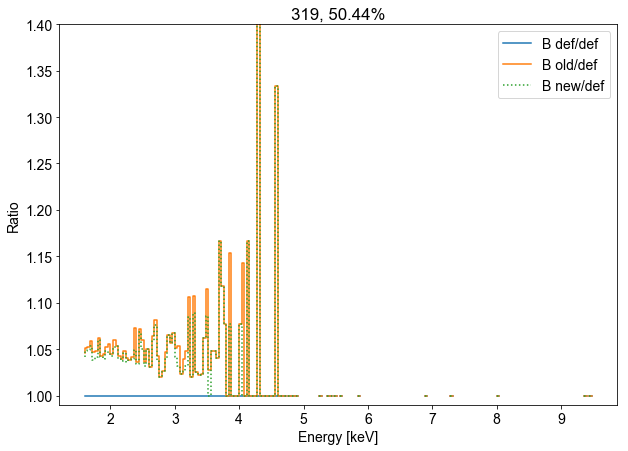

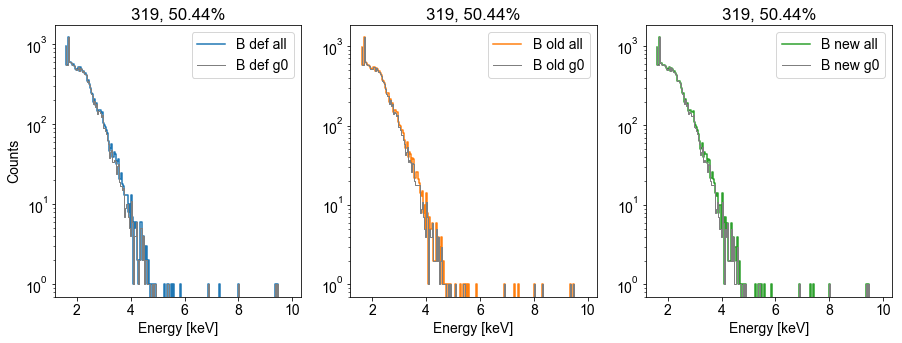

In [6]:
#  Now repeat all this for FPMB
print('FPMB')
infile='nu20511'+mosid+'001B06_cl.evt'
hdulist = fits.open(dir0+infile)
evtd0b=hdulist[1].data
hdr0b= hdulist[1].header
hdulist.close()

hdulist = fits.open(dir1+infile)
evtd1b=hdulist[1].data
hdr1b= hdulist[1].header
hdulist.close()

hdulist = fits.open(dir2+infile)
evtd2b=hdulist[1].data
hdr2b= hdulist[1].header
hdulist.close()

# Double check livetimes and how many events made it through
lvper0b=100.*hdr0b['livetime']/hdr0b['ontime']
lvper1b=100.*hdr1b['livetime']/hdr1b['ontime']
lvper2b=100.*hdr2b['livetime']/hdr2b['ontime']
print('Ontime: ',hdr0b['ontime'],'s , Livetime',hdr0b['livetime'],'s')
print('Livetime %: ',lvper0b,lvper1b,lvper2b)
print('Number of events: ')
print('evtd0(def): ',len(evtd0b['pi']))
print('evtd1(old): ',len(evtd1b['pi']))
print('evtd2(new): ',len(evtd2b['pi']))

# Make spectra for all events
hist0b, be0b=np.histogram(evtd0b['pi']*0.04+1.6,bins=np.arange(1.6,10,0.04))
hist1b, be1b=np.histogram(evtd1b['pi']*0.04+1.6,bins=np.arange(1.6,10,0.04))
hist2b, be2b=np.histogram(evtd2b['pi']*0.04+1.6,bins=np.arange(1.6,10,0.04))

# work out the grade 0 spectra as well
g0pi0b=evtd0b['pi'][evtd0b['grade']==0]
hist0g0b, be0g0b=np.histogram(g0pi0b*0.04+1.6,bins=np.arange(1.6,10,0.04))
g0pi1b=evtd1b['pi'][evtd1b['grade']==0]
hist1g0b, be1g0b=np.histogram(g0pi1b*0.04+1.6,bins=np.arange(1.6,10,0.04))
g0pi2b=evtd2b['pi'][evtd2b['grade']==0]
hist2g0b, be2g0b=np.histogram(g0pi2b*0.04+1.6,bins=np.arange(1.6,10,0.04))

print('def, all vs g0: ',len(evtd0b['pi']),len(g0pi0b))
print('old, all vs g0: ',len(evtd1b['pi']),len(g0pi1b))
print('new, all vs g0: ',len(evtd2b['pi']),len(g0pi2b))

fig = plt.figure(figsize=(10, 7))
plt.plot(be0b[:-1],hist0b/hist0b,drawstyle='steps-pre',label='B def/def')
plt.plot(be1b[:-1],hist1b/hist0b,drawstyle='steps-pre',label='B old/def')
plt.plot(be2b[:-1],hist2b/hist0b,drawstyle='steps-pre',label='B new/def',ls='dotted')
plt.xlabel('Energy [keV]')
plt.ylabel('Ratio')
plt.ylim([0.99,1.4])
plt.legend()
plt.title(mosid+', '+str(round(lvper0b,2))+'%')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax[0].semilogy(be0b[:-1],hist0b,drawstyle='steps-pre',label='B def all',color='tab:blue')
ax[0].semilogy(be0g0b[:-1],hist0g0b,drawstyle='steps-pre',label='B def g0',color='tab:grey',lw=1)
ax[1].semilogy(be1b[:-1],hist1b,drawstyle='steps-pre',label='B old all',color='tab:orange')
ax[1].semilogy(be1g0b[:-1],hist1g0b,drawstyle='steps-pre',label='B old g0',color='tab:grey',lw=1)
ax[2].semilogy(be2b[:-1],hist2b,drawstyle='steps-pre',label='B new all',color='tab:green')
ax[2].semilogy(be2g0b[:-1],hist2g0b,drawstyle='steps-pre',label='B new g0',color='tab:grey',lw=1)
ax[0].set_ylabel('Counts')
for i in np.arange(3):   
    ax[i].set_xlabel('Energy [keV]')
    ax[i].legend()
    ax[i].set_title(mosid+', '+str(round(lvper0b,2))+'%')
plt.show()